## 시장 지표
추세 지표 - 시장의 흐름을 나타내는 지표 (이동 평균, MACD)

오실레이터 - 과거 일정 기간의 가격 범위 안에서 현재 가격의 상대적인 위치를 알려냄 (스토캐스틱, RSI, 모멘텀)

기타 지표 - 강세장과 약세장에 따른 강도를 예측함


## 단순 이동 평균
단순 이동 평균(이동평균 : SMA) : 가장 기본적이면서 널리 쓰이는 시장 지표

이동평균 : 일정 기간 동안의 가격을 모두 더한 뒤 이를 가격 개수로 나누어 평균 값을 구함

이동평균선 : 이동평균 값들을 모아 선으로 연결한 것, 전반적인 가격 흐름 예측 가능

단순 이동 평균은 오래된 가격의 변동과 최근 가격 변동을 동일하게 반영하므로 최근 가격의 변동이 왜곡 될 가능성이 있음

## 지수 이동 평균
최근의 데이터에 가중치를 부여해 단순 이동평균에 비해서 최근의 데이터 변동을 잘 반영하도록 설계

단순 이동 평균에 비한 장점

- 최근 거래일에 더 많은 가중치를 주기 때문에 최근 가격 변동을 더 잘 나타냄

- 오래된 데이터가 빠져나갈 떄 지수 이동 평균이 급등락하지 않음

지수 이동평균선이 오르면 추세가 상승하고 있음을 나타내므로 매수, 내리고 있다면 매도

기간은 시장 사이클을 절반 (20일 주기를 발견했을 때, 10일 이동평균선 사용)

-> 주로 13일 이동 평균을 사용

## 이동평균 수렴확산 (MACD)
두 개의 선으로 표시(MACD, 신호선(점선))하며, 두 선의 교차점에서 매매 신호가 발생

MACD선 : 종가의 12일 지수 이동평균선에서 26일 지수 이동평균선으로 뺀 것 -> 가격 변화에 상대적으로 빠르게 반응

신호선 : MACD선의 9일 지수 이동평균을 구한 선 -> 가격 변화에 상대적으로 느리게 반응

MACD선이 신호선을 상향 돌파하는 것은 매수세가 시장을 주도한다는 의미 -> 매수 관점 대응 필요


## MACD 히스토그램
원래의 MACD보다 매수와 매도 상태를 더 잘 표현

매수, 매도 비중과 강약세를 표기

MACD 히스토그램 = MACD선 - 신호선

최고의 매수 신호는 MACD 히스토그램이 중심선 아래에 있고, 기울기가 상향 반전하고 있는 상황

가격이 신서점까지 낮아졌으나 MACD 히스토그램이 저점에서 상승하기 시작하면 강세 다이버전스

가격이 신저점을 갱신하면서 MACD 히스토그램도 낮아지고 있다면 단순한 하향추세

## 스토캐스틱
지난 n일 동안의 거래 범위에서 현재 가격 위치를 백분율로 나타냄

두 개의 선으로 이루어져 있음
- %K : 빠른 선
- %D : 느린 선


-> 14일 스토캐스틱이 70이라면 지난 14일간 거래에서 최저점과 최고점 사이 70%에 위치

-> 일반적으로 80이상은 과매수 상태, 20 이하는 과매도 상태

박스권에서는 잘 작동하나, 추세에 들어가면 일찍 매도 매수 신호를 보낼 수 있음
-> 장기 추세 추종형 지표와 결합하여 사용

# 삼중창 매매 시스템
추세 추종, 역추세 매매법을 함께 사용하여 정확한 매매시점을 찾음

## 첫 번째 창 - 시장 조류
첫 번째 창을 통해 매수, 매도, 관망 중 한 가지 선택지를 제거할 수 있음 

시장 조류 = 장기 차트를 분석하는 것

자신이 매매하는 시간 단위보다 한 단계 긴 단위 차트를 이용하여 분석

-> 5분 단위로 매매하는 트레이더는 30분 봉으로 추세 분석

C:\Users\Shin\AppData\Local\Programs\Python\Python39\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


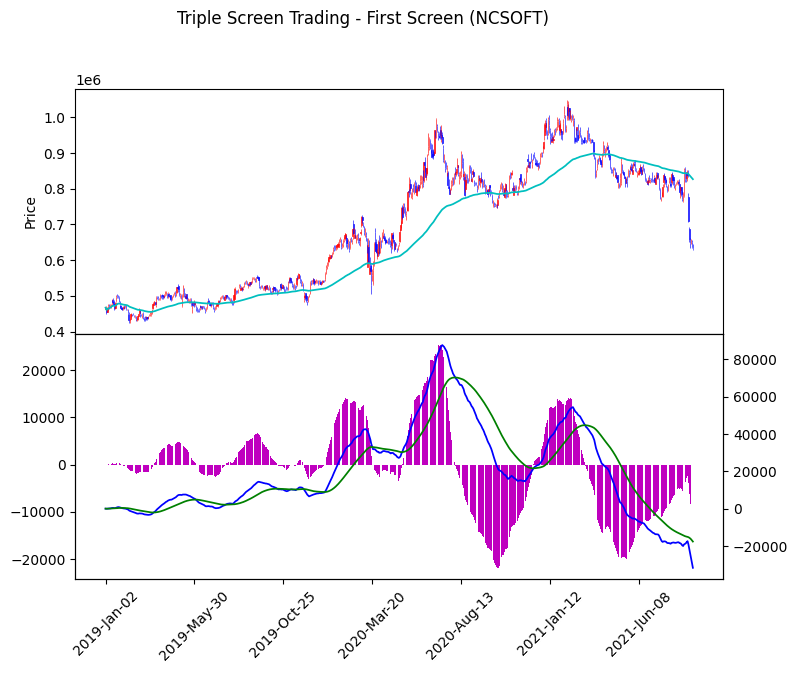

In [7]:
import pandas as pd
import mplfinance as mpf
from Investar import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('엔씨소프트', '2019-01-01', '2021-12-31')
df.index = pd.to_datetime(df.date)
df = df[['open', 'high', 'low', 'close', 'volume']] 

ema60 = df.close.ewm(span=60).mean()   # 종가의 12주 지수 이동평균
ema130 = df.close.ewm(span=130).mean() # 종가의 26주 지수 이동평균 ☆ EMA 130을 주간 추세추종 지표로 사용 -> EMA 130이 오를 때만 시장에 참여
macd = ema60 - ema130                  # MACD선
signal = macd.ewm(span=45).mean()      # 신호선(MACD의 9주 지수 이동평균)
macdhist = macd - signal               # MACD 히스토그램

apds = [mpf.make_addplot(ema130, color='c'),
    mpf.make_addplot(macdhist, type='bar', panel=1, color='m'),
    mpf.make_addplot(macd, panel=1, color='b'),
    mpf.make_addplot(signal, panel=1, color='g'),
    ]
mc = mpf.make_marketcolors(up='r', down='b', inherit=True) 
stl = mpf.make_mpf_style(marketcolors=mc) 
mpf.plot(df, title='Triple Screen Trading - First Screen (NCSOFT)', type='candle',
    addplot=apds, figsize=(9,7), panel_ratios=(1,1), style=stl)


## 두 번째 창 - 시장 파도
첫 번째 창의 방향과 역하는 파도를 파악하는데 오실레이터를 활용

시장이 하락할 때 매수 기회를 제공, 시장이 상상할 때 매도 기회를 제공

-> 주봉 추세가 상승하고 있을 때 일봉 추세가 하락하면 매수 기회라고 생각



end_date is initialized to '2021-09-05'


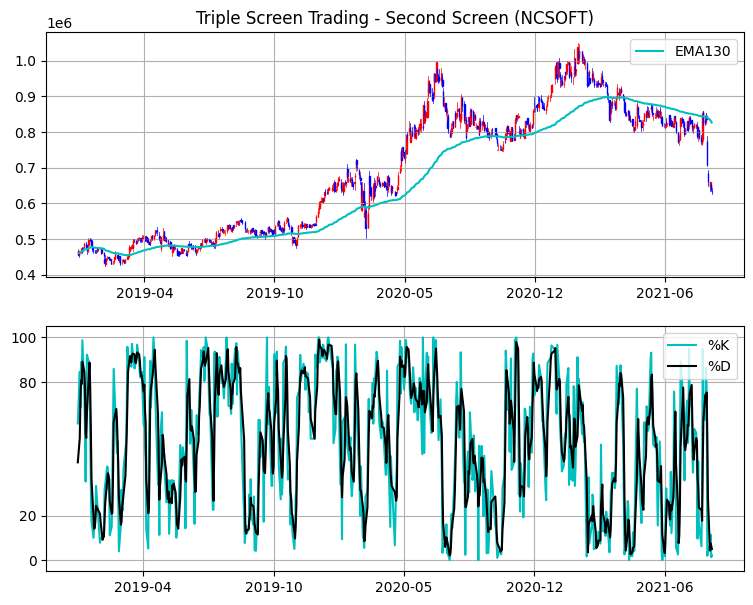

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
from Investar import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('엔씨소프트', '2019-01-01')

ema60 = df.close.ewm(span=60).mean()
ema130 = df.close.ewm(span=130).mean() 
macd = ema60 - ema130
signal = macd.ewm(span=45).mean() 
macdhist = macd - signal

df = df.assign(ema130=ema130, ema60=ema60, macd=macd, signal=signal,
    macdhist=macdhist).dropna()
df['number'] = df.index.map(mdates.date2num)
ohlc = df[['number','open','high','low','close']]

ndays_high = df.high.rolling(window=14, min_periods=1).max() # 14일 동안의 최대 값을 구함, min_periods -> 최소기간을 지정하고 요구 기간만큼 데이터가 없어도 최소기간 이상 데이터 존재하면 최대값 구함
ndays_low = df.low.rolling(window=14, min_periods=1).min() # 14일 동안의 최솟값을 구함
fast_k = (df.close - ndays_low) / (ndays_high - ndays_low) * 100 # 빠른 선 %K 구함
slow_d= fast_k.rolling(window=3).mean() # %K, %D로 df를 생성, 결측치 제거
df = df.assign(fast_k=fast_k, slow_d=slow_d).dropna() # Y축 눈금 지정

plt.figure(figsize=(9, 7))
p1 = plt.subplot(2, 1, 1)
plt.title('Triple Screen Trading - Second Screen (NCSOFT)')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup='red', colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color='c', label='EMA130')
plt.legend(loc='best')
p1 = plt.subplot(2, 1, 2)
plt.grid(True)
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['fast_k'], color='c', label='%K')
plt.plot(df.number, df['slow_d'], color='k', label='%D')
plt.yticks([0, 20, 80, 100]) # ⑥
plt.legend(loc='best')
plt.show()


## 세 번쨰 창 - 진입 기술
첫 번쨰 창과 두 번쨰 창이 동시에 매매 신호를 보냈을 때 진입 시점을 찾아내는 기법

주간 추세가 상승하면 추적 매수 스톱기법으로 가격 변동에 따라 주문 수준을 수정

하락 추세에서는 추적 매도 스톱 기법을 통해 가격 변동에 따라 주문 수준을 수정

---------
주간 상승, 오실레이터 하락 -> 매수

주간 하락, 오실레이터 상승 -> 매도

end_date is initialized to '2021-09-05'


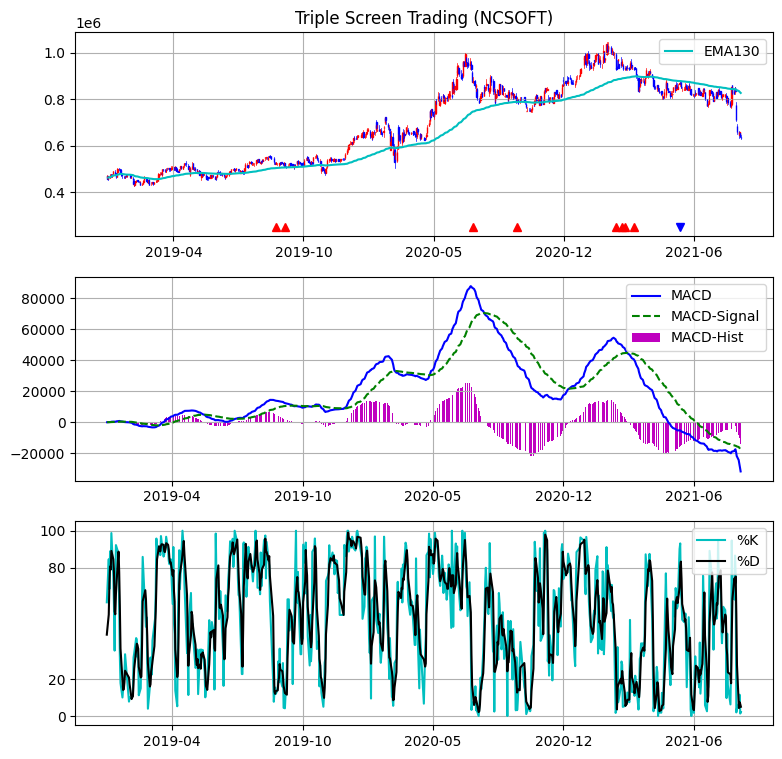

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
from Investar import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('엔씨소프트', '2019-01-01')

ema60 = df.close.ewm(span=60).mean()
ema130 = df.close.ewm(span=130).mean()
macd = ema60 - ema130
signal = macd.ewm(span=45).mean()
macdhist = macd - signal
df = df.assign(ema130=ema130, ema60=ema60, macd=macd, signal=signal, macdhist=macdhist).dropna()

df['number'] = df.index.map(mdates.date2num)
ohlc = df[['number','open','high','low','close']]

ndays_high = df.high.rolling(window=14, min_periods=1).max()
ndays_low = df.low.rolling(window=14, min_periods=1).min()

fast_k = (df.close - ndays_low) / (ndays_high - ndays_low) * 100
slow_d = fast_k.rolling(window=3).mean()
df = df.assign(fast_k=fast_k, slow_d=slow_d).dropna()

plt.figure(figsize=(9, 9))
p1 = plt.subplot(3, 1, 1)
plt.title('Triple Screen Trading (NCSOFT)')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup='red', colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color='c', label='EMA130')
for i in range(1, len(df.close)):
    if df.ema130.values[i-1] < df.ema130.values[i] and \
        df.slow_d.values[i-1] >= 20 and df.slow_d.values[i] < 20:
        plt.plot(df.number.values[i], 250000, 'r^') 
    elif df.ema130.values[i-1] > df.ema130.values[i] and \
        df.slow_d.values[i-1] <= 80 and df.slow_d.values[i] > 80:
        plt.plot(df.number.values[i], 250000, 'bv') 
plt.legend(loc='best')

p2 = plt.subplot(3, 1, 2)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number, df['macdhist'], color='m', label='MACD-Hist')
plt.plot(df.number, df['macd'], color='b', label='MACD')
plt.plot(df.number, df['signal'], 'g--', label='MACD-Signal')
plt.legend(loc='best')

p3 = plt.subplot(3, 1, 3)
plt.grid(True)
p3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['fast_k'], color='c', label='%K')
plt.plot(df.number, df['slow_d'], color='k', label='%D')
plt.yticks([0, 20, 80, 100])
plt.legend(loc='best')
plt.show()
